In [49]:
# Environment used: dash1_8_0_env
import pandas as pd     #(version 1.0.0)
import plotly           #(version 4.5.0)
import plotly.express as px
import dash             #(version 1.8.0)
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate
import matplotlib.pyplot as plt
# print(px.data.gapminder()[:15])

In [45]:
df_cp = pd.read_csv("dataset_with_timestamp")
df_cp = df_cp.drop(['hour', 'month', 'year', 'day'], axis=1)

In [46]:
df_cp['timestamp'] = pd.to_datetime(df_cp['timestamp'], format='%Y-%m-%d %H:%M:%S')


In [59]:
df_cp_day = df_cp.copy()
df_cp_day["timestamp"] = df_cp_day["timestamp"].dt.floor('d')
df_cp_day = df_cp_day.groupby(["timestamp","country"]).mean().reset_index()
df_cp_day.set_index=df_cp_day.timestamp


In [48]:
df_indices = pd.read_csv("daily_indices_82_to_19.csv")
df_indices['timestamp'] = pd.to_datetime(df_indices['timestamp'], format='%Y-%m-%d')

,timestamp,nao,ao,pna,mjo80e,mjo70e,mjo40w,mjo20e,mjo160e,mjo140e,mjo120w,mjo120e,mjo10w,mjo100e,nino4,nino3,nino34
0,1982-01-01,-1.282,-3.065,-1.924,-1.01,-1.07,0.79,-0.65,0.93,0.45,1.16,-0.21,-0.02,-0.29,0.072410,0.358609,0.132533
1,1982-01-02,-1.218,-3.123,-1.714,-1.13,-1.16,0.91,-0.66,0.99,0.44,1.28,-0.30,0.04,-0.38,0.103634,0.429485,0.319885
2,1982-01-03,-1.136,-3.227,-1.448,-1.26,-1.24,1.04,-0.67,1.04,0.42,1.39,-0.39,0.10,-0.47,0.082606,0.404778,0.386582
3,1982-01-04,-0.700,-2.341,-1.476,-1.04,-0.93,0.90,-0.43,0.75,0.23,1.09,-0.41,0.19,-0.48,0.007581,0.305528,0.304645
4,1982-01-05,-0.632,-1.899,-1.785,-0.83,-0.62,0.77,-0.19,0.46,0.04,0.79,-0.43,0.29,-0.49,-0.032671,0.249738,0.169622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13874,2019-12-27,-0.089,-2.070,0.066,0.27,0.31,0.17,0.58,-0.51,-0.56,-0.17,-0.35,0.47,-0.06,0.898650,0.069842,0.273129
13875,2019-12-28,0.037,-0.817,0.463,0.43,0.45,-0.06,0.54,-0.55,-0.42,-0.35,-0.13,0.27,0.16,0.993756,0.049613,0.336122
13876,2019-12-29,0.142,0.613,0.667,0.58,0.59,-0.29,0.49,-0.60,-0.29,-0.54,0.08,0.07,0.37,1.126220,0.064042,0.470419
13877,2019-12-30,0.305,1.898,0.659,0.47,0.43,-0.32,0.25,-0.39,-0.08,-0.44,0.19,-0.09,0.37,1.133595,0.175733,0.617476


<AxesSubplot: >

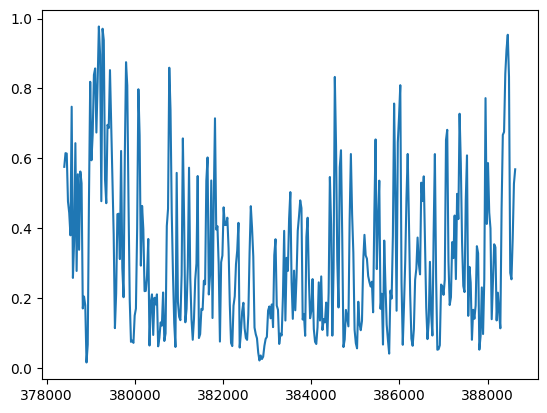

In [64]:
df_cp_day.capacity_factor[df_cp_day.timestamp.dt.year==2016][df_cp_day.country=="GB"].plot()